# **Phishing Detection by Machine Learning Models**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.


## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

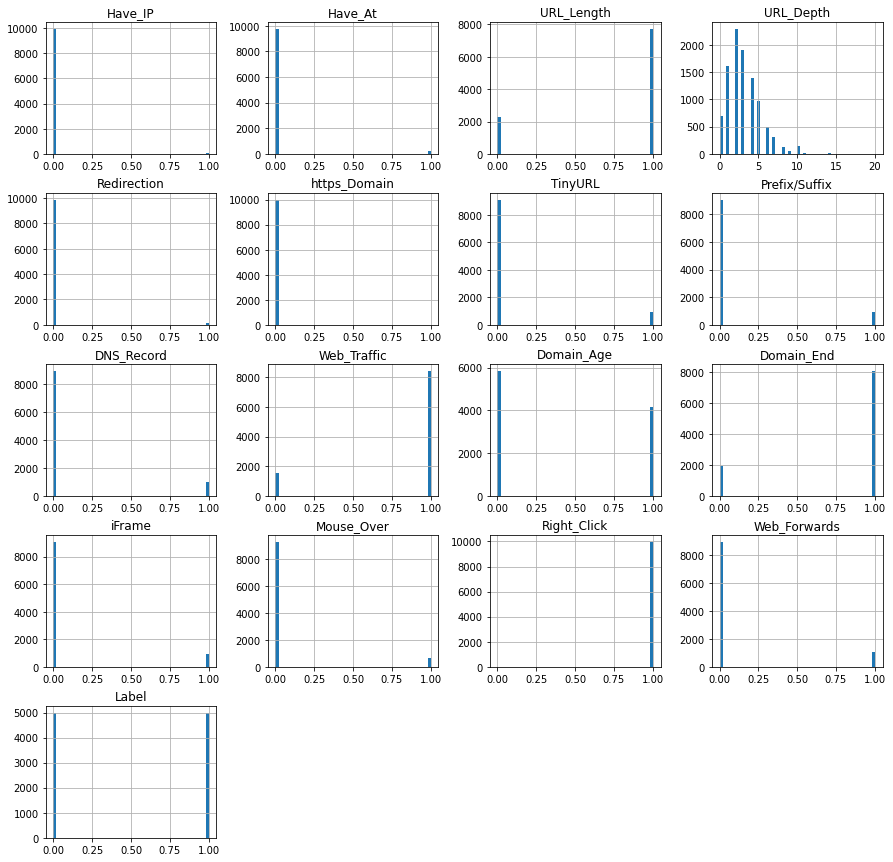

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

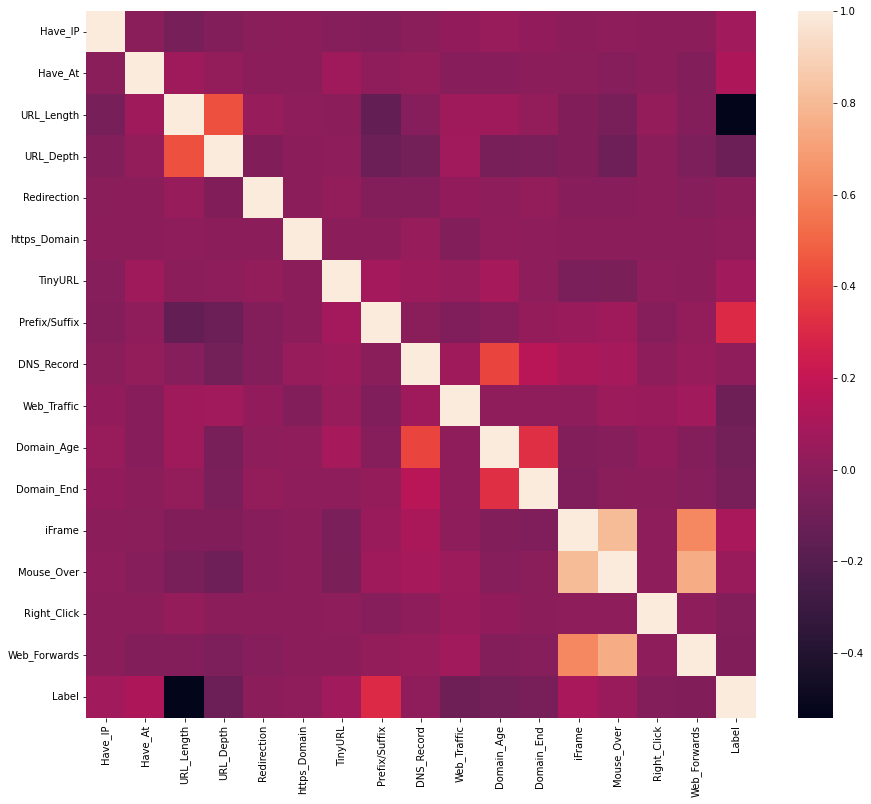

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset.

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64


To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1
2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1
3,0,0,1,4,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 16), (2000, 16), (8000,), (2000,))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Support Vector Machines
* Light GBM
* Cat Boost

In [ ]:
#importing packages
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8071, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
# fit the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=8071)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = lr.predict(X_test)
y_train_tree = lr.predict(X_train)
#predicting the target value from the model for the samples
y_predict= lr.predict(X_test)
model_score=lr.score(X_train, y_train)
print("Train Accuracy: ",model_score*100)
model_score=lr.score(X_test, y_test)
print("Test Accuracy: ",model_score*100)

Train Accuracy:  80.1125
Test Accuracy:  80.85


In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Decision Tree: Accuracy on training Data: 0.801
Decision Tree: Accuracy on test Data: 0.808
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       977
           1       0.94      0.67      0.78      1023

    accuracy                           0.81      2000
   macro avg       0.84      0.81      0.81      2000
weighted avg       0.84      0.81      0.80      2000

[[935  42]
 [341 682]]


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LogisticRegression', acc_train_tree, acc_test_tree)

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=4509, splitter='best')
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4509)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
#predicting the target value from the model for the samples
y_predict= tree.predict(X_test)
model_score=tree.score(X_train, y_train)
print("Train Accuracy: ",model_score*100)
model_score=tree.score(X_test, y_test)
print("Test Accuracy: ",model_score*100)

Train Accuracy:  86.625
Test Accuracy:  86.5


**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Decision Tree: Accuracy on training Data: 0.866
Decision Tree: Accuracy on test Data: 0.865
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       977
           1       0.93      0.80      0.86      1023

    accuracy                           0.86      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.86      0.86      2000

[[912  65]
 [205 818]]


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
#predicting the target value from the model for the samples
y_predict= forest.predict(X_test)
model_score=forest.score(X_test, y_test)
model_score*100

82.3

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Random forest: Accuracy on training Data: 0.817
Random forest: Accuracy on test Data: 0.823
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       977
           1       0.99      0.66      0.79      1023

    accuracy                           0.82      2000
   macro avg       0.86      0.83      0.82      2000
weighted avg       0.86      0.82      0.82      2000

[[967  10]
 [344 679]]


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)
#predicting the target value from the model for the samples
y_predict= mlp.predict(X_test)
model_score=mlp.score(X_test, y_test)
model_score*100

86.85000000000001

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Multilayer Perceptrons: Accuracy on training Data: 0.859
Multilayer Perceptrons: Accuracy on test Data: 0.869
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       977
           1       0.97      0.77      0.86      1023

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.87      0.87      2000

[[951  26]
 [237 786]]


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(use_label_encoder =False,learning_rate=0.1,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=7, use_label_encoder=False)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
#predicting the target value from the model for the samples
y_predict= xgb.predict(X_test)
model_score=xgb.score(X_test, y_test)
model_score*100

87.0

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

XGBoost: Accuracy on training Data: 0.862
XGBoost : Accuracy on test Data: 0.870
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       977
           1       0.93      0.80      0.86      1023

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000

[[917  60]
 [200 823]]


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.5. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)
#predicting the target value from the model for the samples
y_predict= svm.predict(X_test)
model_score=svm.score(X_test, y_test)
model_score*100

80.30000000000001

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

SVM: Accuracy on training Data: 0.801
SVM : Accuracy on test Data: 0.803
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       977
           1       0.97      0.63      0.77      1023

    accuracy                           0.80      2000
   macro avg       0.85      0.81      0.80      2000
weighted avg       0.85      0.80      0.80      2000

[[958  19]
 [375 648]]


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### **7.6. Light GBM**


In [ ]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
lgb.fit(X_train, y_train)

LGBMClassifier(metric='None', n_estimators=5000, n_jobs=4, random_state=314)

In [ ]:
#predicting the target value from the model for the samples
y_test_lgb = lgb.predict(X_test)
y_train_lgb = lgb.predict(X_train)
#predicting the target value from the model for the samples
y_predict= lgb.predict(X_test)
model_score=lgb.score(X_test, y_test)
model_score*100

86.9

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_lgb = accuracy_score(y_train,y_train_lgb)
acc_test_lgb = accuracy_score(y_test,y_test_lgb)

print("LGB: Accuracy on training Data: {:.4f}".format(acc_train_lgb))
print("LGB : Accuracy on test Data: {:.4f}".format(acc_test_lgb))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

LGB: Accuracy on training Data: 0.8659
LGB : Accuracy on test Data: 0.8690
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       977
           1       0.93      0.81      0.86      1023

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000

[[911  66]
 [196 827]]


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LGB', acc_train_lgb, acc_test_lgb)

### **7.7. Cat Boost**


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(
    depth= 15, iterations= 30, learning_rate= 0.1
)
cbc.fit(X_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 151 kB/s 
0:	learn: 0.6513202	total: 50.3ms	remaining: 1.46s
1:	learn: 0.6175272	total: 90.2ms	remaining: 1.26s
2:	learn: 0.5880782	total: 95.6ms	remaining: 861ms
3:	learn: 0.5635685	total: 101ms	remaining: 657ms
4:	learn: 0.5440423	total: 107ms	remaining: 533ms
5:	learn: 0.5260961	total: 109ms	remaining: 436ms
6:	learn: 0.5077224	total: 456ms	remaining: 1.5s
7:	learn: 0.4921698	total: 808ms	remaining: 2.22s
8:	learn: 0.4796757	total: 813ms	remaining: 1.9s
9:	learn: 0.4684810	total: 972ms	remaining: 1.94s
10:	learn: 0.4578917	total: 1.33s	remaining: 2.29s
11:	learn: 0.4487702	total: 1.68s	remaining: 2.52s
12:	learn: 0.4404308	total: 1.71s	remaining: 2.24s
13:	learn: 0.4330536	total: 1.87s	remaining: 2.13s
14:	learn: 0.4259248	total: 1.91s	remaining: 1.91s
15:	learn: 0.4203755	total: 1.91s	remaining: 1.67s
16:	learn: 0.4142113	total: 2.26s	re

In [ ]:
#predicting the target value from the model for the samples
y_test_cbc = cbc.predict(X_test)
y_train_cbc = cbc.predict(X_train)
#predicting the target value from the model for the samples
y_predict= cbc.predict(X_test)
model_score=cbc.score(X_test, y_test)
model_score*100

85.3

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_cbc = accuracy_score(y_train,y_train_cbc)
acc_test_cbc = accuracy_score(y_test,y_test_cbc)

print("CBC: Accuracy on training Data: {:.3f}".format(acc_train_cbc))
print("CBC : Accuracy on test Data: {:.3f}".format(acc_test_cbc))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

CBC: Accuracy on training Data: 0.845
CBC : Accuracy on test Data: 0.853
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       977
           1       0.98      0.72      0.83      1023

    accuracy                           0.85      2000
   macro avg       0.88      0.86      0.85      2000
weighted avg       0.88      0.85      0.85      2000

[[965  12]
 [282 741]]


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CBC', acc_train_cbc, acc_test_cbc)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.801,0.808
1,Decision Tree,0.866,0.865
2,Random Forest,0.817,0.823
3,Multilayer Perceptrons,0.859,0.868
4,XGBoost,0.862,0.870
5,SVM,0.801,0.803
6,LGB,0.866,0.869
7,CBC,0.845,0.853


In [ ]:
#Sorting the dataframe on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
4,XGBoost,0.862,0.870
6,LGB,0.866,0.869
3,Multilayer Perceptrons,0.859,0.868
1,Decision Tree,0.866,0.865
7,CBC,0.845,0.853
2,Random Forest,0.817,0.823
0,LogisticRegression,0.801,0.808
5,SVM,0.801,0.803


For the above comparision, it is clear that the XG Booster Classifier works well with this dataset.

So, saving the model for future use.

In [ ]:
index_1b = 1  # Assuming 1b corresponds to the second value
index_2 = 2

# Plotting the graphs
plt.figure(figsize=(8, 5))

# Graph 1 for 1b
plt.subplot(1, 2, 1)
plt.bar(results['ML Model'], results['Train Accuracy'], color='blue')
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=90)

# Adding values on the bar graph
for i, acc in enumerate(results['Train Accuracy']):
    plt.text(i, acc, str(acc), ha='center', va='bottom')
# Graph 2 for 2
plt.subplot(1, 2, 2)
plt.bar(results['ML Model'], results['Test Accuracy'], color='green')
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=90)
# Adding values on the bar graph
for i, acc in enumerate(results['Test Accuracy']):
    plt.text(i, acc, str(acc), ha='center', va='bottom')


plt.tight_layout()
plt.show()

## **9. Saving Models**

In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(mlp, open("MultiLayerPerceptron.pickle.dat", "wb"))

In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [ ]:
# save Random Forest model to file
import pickle
pickle.dump(forest, open("RandomForestClassifier.pickle.dat", "wb"))

In [ ]:
# save Light GBM model to file
import pickle
pickle.dump(lgb, open("LightGBMClassifier.pickle.dat", "wb"))

## **10. Testing**

### **10.1. Feature Extraction:**

In this step, features are extracted from the URLs dataset.

The extracted features are categorized into


1.   Address Bar based Features
2.   Domain based Features
3.   HTML & Javascript based Features



#### **10.1.1. Address Bar Based Features:**

Many features can be extracted that can be consided as address bar base features. Out of them, below mentioned were considered for this project.


*   Domain of URL
*   IP Address in URL
*   "@" Symbol in URL
*   Length of URL
*   Depth of URL
*   Redirection "//" in URL
*   "http/https" in Domain name
*   Using URL Shortening Services “TinyURL”
*   Prefix or Suffix "-" in Domain

Each of these features are explained and the coded below:

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

##### **10.1.1.1. Domain of the URL**
Here, we are just extracting the domain present in the URL. This feature doesn't have much significance in the training. May even be dropped while training the model.

In [ ]:
# 1.Domain of the URL (Domain)
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

##### **10.1.1.2. IP Address in the URL**

Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

If the domain part of URL has IP address, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).



In [ ]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip


##### **10.1.1.3. "@" Symbol in URL**

Checks for the presence of '@' symbol in the URL. Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.

If the URL has '@' symbol, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

##### **10.1.1.4. Length of URL**

Computes the length of the URL. Phishers can use long URL to hide the doubtful part in the address bar. In this project, if the length of the URL is greater than or equal 54 characters then the URL classified as phishing otherwise legitimate.

If the length of URL >= 54 , the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

##### **10.1.1.5. Depth of URL**

Computes the depth of the URL. This feature calculates the number of sub pages in the given url based on the '/'.

The value of feature is a numerical based on the URL.

In [ ]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

##### **10.1.1.6. Redirection "//" in URL**

Checks the presence of "//" in the URL. The existence of “//” within the URL path means that the user will be redirected to another website. The location of the “//” in URL is computed. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.

If the "//" is anywhere in the URL apart from after the protocal, thee value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

##### **10.1.1.7. "http/https" in Domain name**

Checks for the presence of "http/https" in the domain part of the URL. The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users.

If the URL has "http/https" in the domain part, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

##### **10.1.1.8. Using URL Shortening Services “TinyURL”**

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL.

If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

##### **10.1.1.9. Prefix or Suffix "-" in Domain**

Checking the presence of '-' in the domain part of URL. The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage.

If the URL has '-' symbol in the domain part of the URL, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

#### **10.1.2. Domain Based Features:**

Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

*   DNS Record
*   Website Traffic
*   Age of Domain
*   End Period of Domain

Each of these features are explained and the coded below:

In [ ]:
!pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 20.5 MB/s 
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103263 sha256=ef461bfe81248e22ea5549ca7d27c5816443d4990de86caa7cf6dde7d63bfb1d
  Stored in directory: /root/.cache/pip/wheels/ae/7d/a1/7cfba90ff34974c64149b70f689ff77dde232b8f1ec5de43b3
Successfully built python-whois


In [ ]:
# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

##### **10.1.2.1. DNS Record**

For phishing websites, either the claimed identity is not recognized by the WHOIS database or no records founded for the hostname.
If the DNS record is empty or not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 11.DNS Record availability (DNS_Record)
# obtained in the featureExtraction function itself

##### **10.1.2.2. Web Traffic**

This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”.

If the rank of the domain < 100000, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

In [ ]:
# 12.Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    #url = urllib.parse.quote(url)
    #rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
    rank = int(1)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

##### **10.1.2.3. Age of Domain**

This feature can be extracted from WHOIS database. Most phishing websites live for a short period of time. The minimum age of the legitimate domain is considered to be 12 months for this project. Age here is nothing but different between creation and expiration time.

If age of domain > 12 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

In [ ]:
# 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

##### **10.1.2.4. End Period of Domain**

This feature can be extracted from WHOIS database. For this feature, the remaining domain time is calculated by finding the different between expiration time & current time. The end period considered for the legitimate domain is 6 months or less  for this project.

If end period of domain > 6 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

In [ ]:
# 14.End time of domain: The difference between termination time and current time (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

#### **10.1.3. HTML and JavaScript based Features**

Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

*   IFrame Redirection
*   Status Bar Customization
*   Disabling Right Click
*   Website Forwarding

Each of these features are explained and the coded below:

In [ ]:
# importing required packages for this section
import requests

#### **10.1.3.1. IFrame Redirection**

IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation.

If the iframe is empty or repsonse is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 15. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

#### **10.1.3.2. Status Bar Customization**

Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar

If the response is empty or onmouseover is found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 16.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

#### **10.1.3.3. Disabling Right Click**

Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled.

If the response is empty or onmouseover is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).




In [ ]:
# 17.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

#### **10.1.3.4. Website Forwarding**
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.




In [ ]:
# 18.Checks the number of forwardings (Web_Forwards)
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

### **10.2. Computing URL Features**

Create a list and a function that calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.

In [ ]:
#Function to extract features
def featureExtraction(url):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  #Domain based features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))

  # HTML & Javascript based features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  #features.append(label)

  return features

### **10.3. Get Freshly Updated Phishing Links from Phishtank**

In [ ]:
!wget https://phishstats.info/phish_score.csv

URL transformed to HTTPS due to an HSTS policy
--2022-11-07 16:25:55--  https://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.16.101.75, 104.17.177.85, 2606:4700::6811:b155, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.16.101.75|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1667838365&Signature=mznjRdC6v-m6Ktp96bn8Cyq1p1DFn9jBMgZVVsTsNJLbKbt2ao22-y8MqQYqfACZUaQVgkn1ZmE8IBl3HIVf6wOljM0S1Mu6rGm377cLB9DTASJ57Tfam9k6FqHrtx3MnX6~oB4MU-Ys06OXTw5XgLI1Zji4m9xX6riMUFQxwMAip9sEtmoMyfjSlLOmqMXGyHwJkMC~nFLawdKakfB8ZjKi2XUPTZH3EPAD8eYFfrTgHE~YybpJteCZlHx4c3dtlzkss~GryYbUdEqJveRCbWwB7y5elGywstaeImdx8ZQ0Rv8JygHpydi~hNsXY1D4IDCr9ztRaVqnpIrhrUqMRw__&Key-Pair-Id=APKAILB45UG3RB4CSOJA [following]
--2022-11-07 16:25:55--  https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1667838365&Signature=mznjRdC6v-m6Ktp96bn8Cyq1p1DFn9jBMgZVVs

In [ ]:
column_names = ['Time', 'Score', 'URL', 'IP']
data = pd.read_csv("/kaggle/working/phish_score.csv", header=None, skiprows=10,names=column_names)
data = data.sample(n = 50, random_state = 50).copy()

#data.columns = ['URL']
data = data.reset_index(drop=True)

In [ ]:
data.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,6465881,https://icreateafrica.com/blog/index.php?email...,http://www.phishtank.com/phish_detail.php?phis...,2020-03-24T07:42:01+00:00,yes,2020-03-24T07:43:44+00:00,yes,Other
1,6527362,https://www.universidadeinternacional.com/HayH...,http://www.phishtank.com/phish_detail.php?phis...,2020-04-25T05:06:29+00:00,yes,2020-04-25T05:07:48+00:00,yes,PayPal
2,6550701,https://flemingtapetes.net.br/3d/3d/,http://www.phishtank.com/phish_detail.php?phis...,2020-05-06T16:01:40+00:00,yes,2020-05-06T16:10:29+00:00,yes,Other
3,6542596,http://m5wx.com/news/wp-content/plugins/fyaout...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-02T11:08:36+00:00,yes,2020-05-02T11:16:45+00:00,yes,Other
4,6299583,http://haraktis.ru/includes/,http://www.phishtank.com/phish_detail.php?phis...,2019-11-29T02:05:25+00:00,yes,2019-11-29T03:09:56+00:00,yes,Other


In [ ]:
data.shape

(50, 8)

In [ ]:
print(data['url'])

0     https://icreateafrica.com/blog/index.php?email...
1     https://www.universidadeinternacional.com/HayH...
2                  https://flemingtapetes.net.br/3d/3d/
3     http://m5wx.com/news/wp-content/plugins/fyaout...
4                          http://haraktis.ru/includes/
5                                      https://jagex.nu
6     http://bajer.info.pl/plugins/authentication/he...
7      http://u718633rwt.ha004.t.justns.ru/SG/allo/prin
8     https://www.hindva.com/demohindva/.well-known/...
9                    http://neovinil.com.br/p/app/index
10             https://portraitomar.net/ayin/No_cap/FBG
11                           http://golosavk.vipshop.ru
12    https://playarprint.com/chase/home.php?public/...
13                    http://managephoenix.com/o/36519/
14         https://michaeljanusmusic2.godaddysites.com/
15    http://xn--ugbd1cbxo23egh.com/citrixsh/741aab4...
16                          https://ettalee.com/Singin/
17    http://sethsbananacam.com/css/mtb2020/onli

In [ ]:
#Extracting the feautres & storing them in a list
phish_features = []
Last = 20
for i in range(0, Last):
  url = data['url'][i]
  phish_features.append(featureExtraction(url))

ERROR:urllib3.connection:Certificate did not match expected hostname: flemingtapetes.net.br. Certificate: {'subject': ((('commonName', '*.websiteseguro.com'),),), 'issuer': ((('countryName', 'BE'),), (('organizationName', 'GlobalSign nv-sa'),), (('commonName', 'AlphaSSL CA - SHA256 - G2'),)), 'version': 3, 'serialNumber': '261767BE18C111BEAD204E53', 'notBefore': 'Mar 22 15:43:48 2022 GMT', 'notAfter': 'Apr 23 15:43:47 2023 GMT', 'subjectAltName': (('DNS', '*.websiteseguro.com'), ('DNS', 'websiteseguro.com')), 'OCSP': ('http://ocsp2.globalsign.com/gsalphasha2g2',), 'caIssuers': ('http://secure.globalsign.com/cacert/gsalphasha2g2r1.crt',), 'crlDistributionPoints': ('http://crl.globalsign.com/gs/gsalphasha2g2.crl',)}


In [ ]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,icreateafrica.com,0,1,1,2,0,0,0,0,0,1,1,1,0,0,1,0
1,universidadeinternacional.com,0,0,1,3,0,0,0,0,1,1,1,1,1,1,1,1
2,flemingtapetes.net.br,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1
3,m5wx.com,0,0,1,8,0,0,1,0,1,1,1,1,1,1,1,1
4,haraktis.ru,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Storing the extracted Test Data URLs features to csv file
phishing.to_csv('testd.csv', index= False)

### **10.4. Testing URLs:**


In [ ]:
model=pickle.load(open('MultiLayerPerceptron.pickle.dat','rb'))
df = pd.read_csv('testd.csv')
predictions=model.predict(df.drop('Domain',axis=1))
for i in range(0,Last):
  if predictions[i] == 1:
    print(data['url'][i],"is a Phishing Link")
  else:
    print(data['url'][i],"is NOT a Phishing Link")
print(predictions)

https://icreateafrica.com/blog/index.php?email=boris@ub.unibe.ch is a Phishing Link
https://www.universidadeinternacional.com/HayHay/app/index is NOT a Phishing Link
https://flemingtapetes.net.br/3d/3d/ is a Phishing Link
http://m5wx.com/news/wp-content/plugins/fyaoutu/yo/WellsFargo/wells/wells.htm is a Phishing Link
http://haraktis.ru/includes/ is a Phishing Link
https://jagex.nu is a Phishing Link
http://bajer.info.pl/plugins/authentication/help/customer_center/customer-IDPP00C199/myaccount/signin/ is a Phishing Link
http://u718633rwt.ha004.t.justns.ru/SG/allo/prin is a Phishing Link
https://www.hindva.com/demohindva/.well-known/pki-validation/ghdghg/n7jgy1q861w629px298z1q4w.php?87ADH015838606580705b30d09805a0824763175caf4d4b30705b30d09805a0824763175caf4d4b30705b30d09805a0824763175caf4d4b30705b30d09805a0824763175caf4d4b30705b30d09805a0824763175caf4d4b3&Official=&AdnanSami is a Phishing Link
http://neovinil.com.br/p/app/index is a Phishing Link
https://portraitomar.net/ayin/No_cap/FBG